 # **Introduction**
 
 
 In this notebook  , I'll provide a brief introduction to the dataset I've selected for analysis
 
 This data set contains information
about 10,000 movies collected from
The Movie Database (TMDb),
including user ratings and revenue.

[www.kaggle.com/tmdb/tmdb-movie-metadata](http://)


● Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters.

● There are some odd characters in the ‘cast’ column

●The final two columns ending with adj show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.
 


Here's some of questions which  i asked based on Dataset

 
1. What is the average runtime of all movies?
2. Which are the successfull genres?
3. Which movie had the highest and lowest budget?
3. What is the average budget of the movie?


In [ ]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import csv 

In [ ]:
#read our data using pandas 
data =  pd.read_csv("../input/tmdb-movie-metadata/tmdb_5000_movies.csv")
#showing head of our dataset
data.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


# Wrangling the data


Data wrangling is the process of gathering, selecting, and transforming data to answer an analytical question.

In [ ]:
#detailed information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [ ]:
#lenght of our data
print(len(data))

4803


In [ ]:
#describe our data
data.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [ ]:
#columns names
columns = data.columns
#print(columns)

# Cleaning our data



first detect which columns is not important for me to delete it from our original data 

In [ ]:
#deleted columns 
deleted_columns = [ 'id', 'popularity', 'homepage', 'keywords', 'tagline', 'overview', 'production_companies', 'vote_average']
#drop it from our data
data.drop(deleted_columns,axis = 1 ,inplace = True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   original_language     4803 non-null   object 
 3   original_title        4803 non-null   object 
 4   production_countries  4803 non-null   object 
 5   release_date          4802 non-null   object 
 6   revenue               4803 non-null   int64  
 7   runtime               4801 non-null   float64
 8   spoken_languages      4803 non-null   object 
 9   status                4803 non-null   object 
 10  title                 4803 non-null   object 
 11  vote_count            4803 non-null   int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 450.4+ KB


In [ ]:
data.head()

,budget,genres,original_language,original_title,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Avatar,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",en,Pirates of the Caribbean: At World's End,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,Spectre,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",en,The Dark Knight Rises,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",en,John Carter,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,2124


In [ ]:
#removing nan object  or  0 
columns = ['budget', 'revenue']
data[columns] = data[columns].replace(0, np.NaN)
data.dropna(subset = columns, inplace = True)
rows, col = data.shape
print(rows,col)

3229 12


# Exploratory Data Analysis¶


We will now compute statistics and create visualizations with the goal of addressing the research questions that we posed in the Introduction section.






# **Q1** : 1. What is the average runtime of all movies?

In [ ]:
# Average runtime of movies
data['runtime'].mean()

110.72437287085785

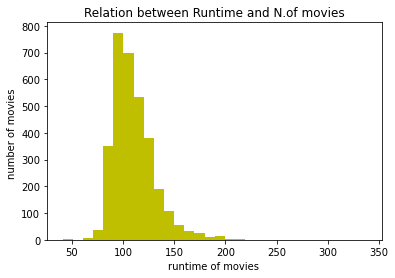

In [ ]:
#plot relation between runtime and budget
plt.title("Relation between Runtime and N.of movies")
plt.xlabel("runtime of movies ")
plt.ylabel("number of movies ")
plt.hist(data["runtime"],bins= 30,color="y" )
plt.show()

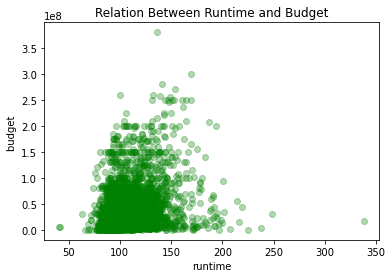

In [ ]:
#plot relation between runtime and budget
plt.title("Relation Between Runtime and Budget")
plt.xlabel("runtime")
plt.ylabel("budget ")
plt.scatter(data["runtime"],data["budget"], alpha=0.3,color = "g")
plt.show()

# **Q2** : 2. Which are the successfull genres?

In [ ]:
#showing types of our movies 
print(data.iloc[:,1].values)

['[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'
 '[{"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 28, "name": "Action"}]'
 '[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 80, "name": "Crime"}]'
 ...
 '[{"id": 80, "name": "Crime"}, {"id": 27, "name": "Horror"}, {"id": 9648, "name": "Mystery"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 878, "name": "Science Fiction"}, {"id": 18, "name": "Drama"}, {"id": 53, "name": "Thriller"}]'
 '[{"id": 28, "name": "Action"}, {"id": 80, "name": "Crime"}, {"id": 53, "name": "Thriller"}]']


In [ ]:
count = pd.Series(data['genres'].str.cat(sep = '|').split('|')).value_counts(ascending = False)
count

[{"id": 18, "name": "Drama"}]                                                                                                                                             204
[{"id": 35, "name": "Comedy"}]                                                                                                                                            197
[{"id": 18, "name": "Drama"}, {"id": 10749, "name": "Romance"}]                                                                                                            96
[{"id": 35, "name": "Comedy"}, {"id": 10749, "name": "Romance"}]                                                                                                           87
[{"id": 35, "name": "Comedy"}, {"id": 18, "name": "Drama"}]                                                                                                                70
                                                                                                                                  

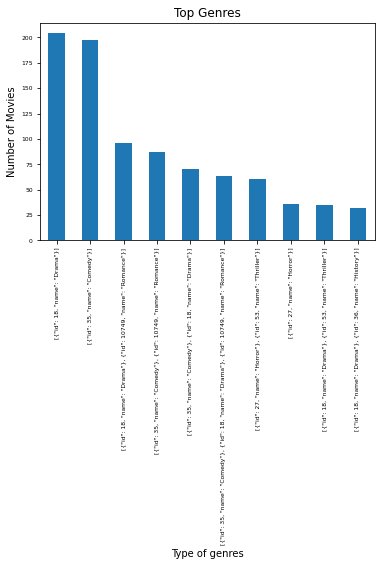

In [ ]:
# Initialize the plot
diagram = count[:10].plot.bar(fontsize = 6)
# Set a title
diagram.set(title = 'Top Genres')
# x-label and y-label
diagram.set_xlabel('Type of genres')
diagram.set_ylabel('Number of Movies')
# Show the plot
plt.show()

Darma is highest number of movies and it is successful genres

# **Q3**  : 3. Which movie had the highest and lowest budget?

In [ ]:
# highest budget
x = data.loc[data['budget'].idxmax()]
print(x)
print("======================================")
print(x["budget"])
print("======================================")
print(x["title"])

budget                                                            3.8e+08
genres                  [{"id": 12, "name": "Adventure"}, {"id": 28, "...
original_language                                                      en
original_title                Pirates of the Caribbean: On Stranger Tides
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2011-05-14
revenue                                                       1.04571e+09
runtime                                                               136
spoken_languages        [{"iso_639_1": "en", "name": "English"}, {"iso...
status                                                           Released
title                         Pirates of the Caribbean: On Stranger Tides
vote_count                                                           4948
Name: 17, dtype: object
380000000.0
Pirates of the Caribbean: On Stranger Tides


In [ ]:
#Lowest budget 
y=data.loc[data['budget'].idxmin()]
print(y)
print("======================================")
print(y ["budget"])
print("======================================")
print(y["title"])


budget                                                                  1
genres                  [{"id": 18, "name": "Drama"}, {"id": 35, "name...
original_language                                                      en
original_title                                               Modern Times
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   1936-02-05
revenue                                                           8.5e+06
runtime                                                                87
spoken_languages                 [{"iso_639_1": "en", "name": "English"}]
status                                                           Released
title                                                        Modern Times
vote_count                                                            856
Name: 4238, dtype: object
1.0
Modern Times


# **Q4:**  What is the average budget of the movie?

In [ ]:
#mean of our budget data
budget_mean = data.iloc[:,0].mean()
print(budget_mean)

40654444.774233505


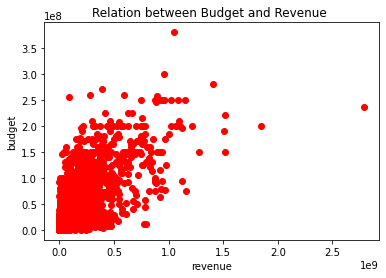

In [ ]:
#plot relation between budget and revenue   
revenue = data.iloc [:,6].values
budget =  data.iloc[:,0].values 
plt.title("Relation between Budget and Revenue ")
plt.xlabel("revenue")
plt.ylabel("budget")
plt.scatter(revenue,budget , color = "r" )

